In [1]:
using Serialization
using Dates
using Gadfly

In [2]:
data = deserialize("../data/data_hhs.jlser");

In [3]:
date_range = collect(data.start_date : Day(1) : data.end_date);

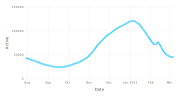

In [4]:
plot(
    x = date_range,
    y = sum(data.casesdata[(:moderate, :allbeds)].active, dims=1)[:],
    Scale.y_continuous(format=:plain),
    Geom.point, Geom.line,
    Guide.xlabel("Date"), Guide.ylabel("Active"),
) |> SVG(18cm, 10cm)

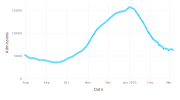

In [5]:
plot(
    x = date_range,
    y = sum(data.casesdata[(:moderate, :allbeds)].admitted, dims=1)[:],
    Geom.point, Geom.line,
    Scale.y_continuous(format=:plain),
    Coord.cartesian(ymin=0),
    Guide.xlabel("Date"), Guide.ylabel("Admissions"),
) |> SVG(18cm, 10cm)

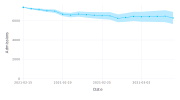

In [18]:
z = 200
ds = date_range[z:end]
ys = sum(data.casesdata[(:moderate, :allbeds)].admitted, dims=1)[:][z:end]
qs = cumsum(ones(length(ds))) / length(ds) * 0.1
plot(
    x = ds,
    y = ys,
    ymin = ys - (ys .* qs),
    ymax = ys + (ys .* qs),
    Geom.point, Geom.line, Geom.ribbon,
    Scale.y_continuous(format=:plain),
    Coord.cartesian(ymin=0),
    Guide.xlabel("Date"), Guide.ylabel("Admissions"),
    Guide.xticks(ticks=DateTime.(ds[1]:Day(5):ds[end])),
    Scale.x_continuous(labels=x->Dates.format(x,"Y-mm-dd")),
) |> SVG(18cm, 10cm)